<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/main/210625_Project1_Bruno_Tucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head()


,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [ ]:
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [ ]:
df.dtypes

School DBN                     object
School Name                    object
School Level                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Mean Score                     object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [5]:

df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors = 'coerce')

In [ ]:
df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'], errors = 'coerce')

In [ ]:
df['Mean Score'].dtype

dtype('float64')

In [ ]:
df['School DBN'].is_unique

False

In [ ]:
df.groupby(['Regents Exam']).describe().round(1)

Year               ... Total Tested              
                                   count    mean  std  ...          50%   75%     max
Regents Exam                                           ...                           
Algebra2/Trigonometry            10788.0  2015.8  0.7  ...         10.0  29.0  1477.0
Common Core Algebra              29254.0  2016.0  0.8  ...         22.0  67.0  1384.0
Common Core Algebra2              7915.0  2016.6  0.5  ...         12.0  36.0  1380.0
Common Core English              19878.0  2016.1  0.8  ...         24.0  66.0  1554.0
Common Core Geometry             15267.0  2016.1  0.8  ...         19.0  52.0  1527.0
English                          11091.0  2015.4  0.5  ...         14.0  43.0  1240.0
Geometry                          8509.0  2015.4  0.5  ...         10.0  35.0  1326.0
Global History and Geography     19192.0  2016.0  0.8  ...         39.0  90.0  1453.0
Integrated Algebra               11022.0  2015.4  0.5  ...         12.0  35.0  1106.0
Living Environment               25539.0  2016.0  0.8  ...         27.0  70.0  1216.0
Physical Settings/Chemistry      11670.0  2016.0  0.8  ...         13.0  36.0  1467.0
Physical Settings/Earth Science  15971.0  2016.0  0.8  ...         19.0  50.0   753.0
Physical Settings/Physics         5799.0  2016.0  0.8  ...         10.0  28.0  1729.0
U.S. History and Government      20426.0  2016.0  0.8  ...         30.0  70.0  1278.0

[14 rows x 16 columns]

In [ ]:
df.groupby(['Regents Exam'])['Mean Score'].describe().sort_values('mean', ascending=False).round(1)

,count,mean,std,min,25%,50%,75%,max
Regents Exam,,,,,,,,
U.S. History and Government,14752.0,71.1,11.3,33.7,63.1,70.7,78.7,98.7
Common Core English,13319.0,70.4,11.9,15.0,63.4,71.4,78.4,98.3
Living Environment,18243.0,69.1,9.9,36.5,62.0,67.8,75.7,96.8
Common Core Algebra,19549.0,67.5,9.9,37.2,60.3,66.2,74.2,96.6
Physical Settings/Physics,2993.0,66.5,12.3,20.8,59.2,67.7,75.5,94.3
English,6784.0,65.8,10.0,30.7,59.0,66.0,72.1,95.1
Integrated Algebra,6308.0,64.8,7.1,36.7,60.3,64.4,68.8,95.9
Global History and Geography,14713.0,64.2,10.6,28.7,56.9,62.7,70.6,97.0
Physical Settings/Chemistry,6360.0,64.1,9.7,30.2,57.6,63.9,70.4,93.5


In [ ]:
df.groupby(['School Name']).count().round(1)

,School DBN,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School Name,,,,,,,,,,,,,,
47 The American Sign Language and English Secondar,356,356,356,356,356,356,356,356,356,356,356,356,356,356
A. Philip Randolph Campus High School,459,459,459,459,459,459,459,459,459,459,459,459,459,459
ACORN Community High School,364,364,364,364,364,364,364,364,364,364,364,364,364,364
Abraham Lincoln High School,480,480,480,480,480,480,480,480,480,480,480,480,480,480
Abraham Lincoln Yabc,248,248,248,248,248,248,248,248,248,248,248,248,248,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Women's Leadership School,378,378,378,378,378,378,378,378,378,378,378,378,378,378
Young Women's Leadership School of Brooklyn,337,337,337,337,337,337,337,337,337,337,337,337,337,337
Young Women's Leadership School of the Bronx,142,142,142,142,142,142,142,142,142,142,142,142,142,142


In [ ]:
df.groupby(['School Name'])['Mean Score'].describe().sort_values('mean', ascending=False).round(1)

,count,mean,std,min,25%,50%,75%,max
School Name,,,,,,,,
Stuyvesant High School,271.0,91.7,3.4,81.1,89.4,92.5,94.0,97.4
J.H.S. 185 Edward Bleeker,46.0,91.7,3.0,86.0,89.6,91.2,94.4,96.8
The Anderson School,43.0,91.4,3.7,82.6,89.1,92.7,94.4,96.8
The Christa McAuliffe School\I.S. 187,22.0,91.0,1.9,88.0,89.1,91.2,92.6,93.9
East Side Middle School,16.0,90.4,4.5,82.7,85.6,92.3,94.0,94.9
...,...,...,...,...,...,...,...,...
Success Academy Charter School - Harlem 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Technology, Arts, and Sciences Studio",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The 47 American Sign Language & English Lower Scho,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby(['School Name'])['Mean Score'].describe().sort_values('mean', ascending=False).round(1)

,count,mean,std,min,25%,50%,75%,max
School Name,,,,,,,,
Stuyvesant High School,271.0,91.7,3.4,81.1,89.4,92.5,94.0,97.4
J.H.S. 185 Edward Bleeker,46.0,91.7,3.0,86.0,89.6,91.2,94.4,96.8
The Anderson School,43.0,91.4,3.7,82.6,89.1,92.7,94.4,96.8
The Christa McAuliffe School\I.S. 187,22.0,91.0,1.9,88.0,89.1,91.2,92.6,93.9
East Side Middle School,16.0,90.4,4.5,82.7,85.6,92.3,94.0,94.9
...,...,...,...,...,...,...,...,...
Success Academy Charter School - Harlem 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Technology, Arts, and Sciences Studio",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The 47 American Sign Language & English Lower Scho,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


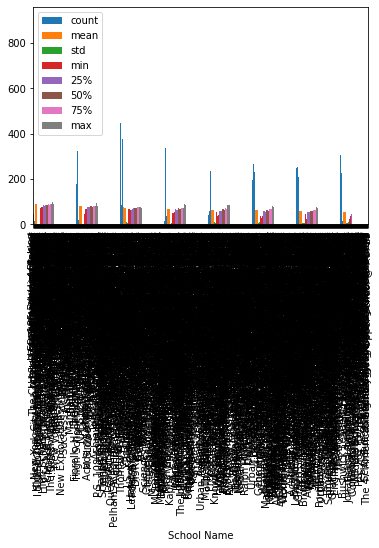

In [ ]:
df.groupby(['School Name'])['Mean Score'].describe().sort_values('mean', ascending=False).round(1).plot(kind='bar')

In [ ]:
df.groupby(['School Name'])['Mean Score'].median().round(1)

School Name
47 The American Sign Language and English Secondar    60.9
A. Philip Randolph Campus High School                 66.6
ACORN Community High School                           62.0
Abraham Lincoln High School                           61.9
Abraham Lincoln Yabc                                  58.8
                                                      ... 
Young Women's Leadership School                       71.9
Young Women's Leadership School of Brooklyn           66.4
Young Women's Leadership School of the Bronx          71.1
Young Women's Leadership School, Astoria              71.8
Young Women's Leadership School, Queens               68.2
Name: Mean Score, Length: 1012, dtype: float64

In [ ]:
df2 = df[(df['School Name']=='The Anderson School') & (['Regents Exam'] == 'English')]


In [ ]:
df3[['School Name']=='Abraham Lincoln High School', ['Regents Exam']=='Geometry']

NameError: ignored

In [ ]:
df2.mean().round(1)

School DBN                    NaN
School Name                   NaN
School Level                  NaN
Regents Exam                  NaN
Year                          NaN
Total Tested                  NaN
Mean Score                    NaN
Number Scoring Below 65       NaN
Percent Scoring Below 65      NaN
Number Scoring 65 or Above    NaN
Percent Scoring 65 or Above   NaN
Number Scoring 80 or Above    NaN
Percent Scoring 80 or Above   NaN
Number Scoring CR             NaN
Percent Scoring CR            NaN
dtype: float64

In [ ]:
df2.describe()

,Year,Total Tested,Mean Score
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [ ]:
df2

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe806a2e1d0>,
      dtype=object)

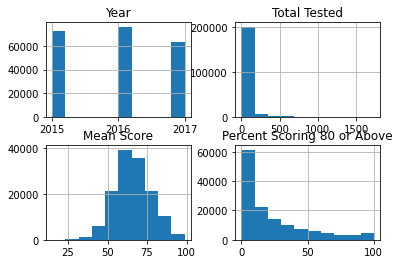

In [ ]:
df.hist()

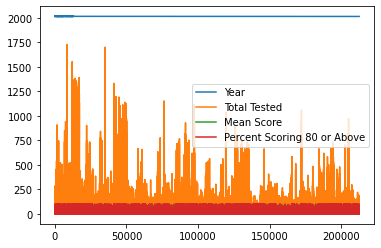

In [ ]:
df.plot()

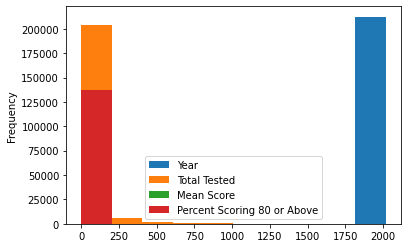

In [ ]:
df.plot(kind = "hist")

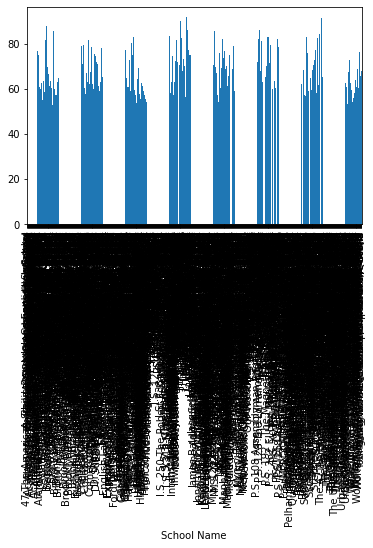

In [ ]:
df.groupby(['School Name'])['Mean Score'].mean().plot(kind='bar')

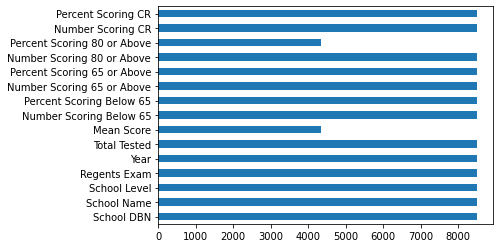

In [ ]:
df[df['Regents Exam']=='Geometry'].count().plot(kind='barh')

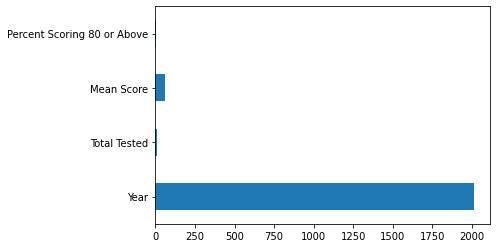

In [ ]:
df[df['Regents Exam']=='Geometry'].median().plot(kind='barh')

In [ ]:
df[df['Regents Exam']=='Geometry' & ['School Name'] =='The Anderson School'].median().plot(kind='barh')

TypeError: ignored

In [ ]:
df[df['Regents Exam'] , ['School Name']].median().plot(kind='barh')

TypeError: ignored

In [ ]:
df[df['Regents Exam']].median().plot(kind='barh')

ValueError: ignored

In [ ]:
df[df['Regents Exam']].count().plot(kind='barh')

ValueError: ignored

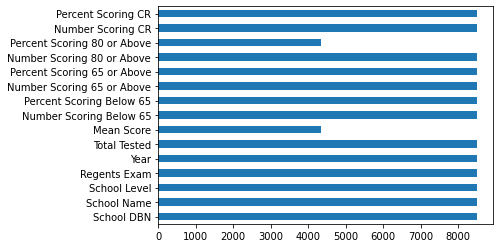

In [ ]:
df[df['Regents Exam']=='Geometry'].count().plot(kind='barh')

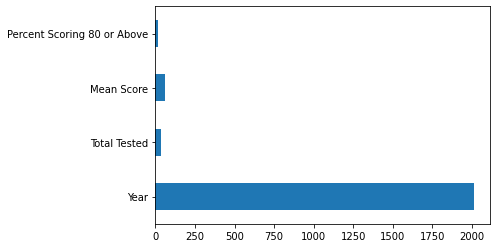

In [ ]:
df[df['Regents Exam']=='Geometry'].mean().plot(kind='barh')

In [ ]:
df1 = df['School Name'] == 'Abraham Lincoln High School'
df1[df1['Regents Exam']=='Geometry'].mean().plot(kind='barh')

KeyError: ignored

In [ ]:
df.groupby(['Regents Exam']).min().round(1)

,School DBN,School Name,School Level,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
Regents Exam,,,,,,,,,,,,,,
Algebra2/Trigonometry,01M292,47 The American Sign Language and English Seco...,High school,2015,1,19.1,0,0,0,0,0,0.0,0,0
Common Core Algebra,01M034,47 The American Sign Language and English Seco...,Elementary,2015,1,37.2,0,0,0,0,0,0.0,0,0
Common Core Algebra2,01M292,47 The American Sign Language and English Seco...,High school,2016,1,33.6,0,0,0,0,0,0.0,0,0
Common Core English,01M188,47 The American Sign Language and English Seco...,High school,2015,1,15.0,0,0,0,0,0,0.0,0,0
Common Core Geometry,01M292,47 The American Sign Language and English Seco...,High school,2015,1,27.0,0,0,0,0,0,0.0,0,0
English,01M292,47 The American Sign Language and English Seco...,High school,2015,1,30.7,0,0,0,0,0,0.0,0,0
Geometry,01M292,47 The American Sign Language and English Seco...,High school,2015,1,29.0,0,0,0,0,0,0.0,0,0
Global History and Geography,01M292,47 The American Sign Language and English Seco...,High school,2015,1,28.7,0,0,0,0,0,0.0,na,na
Integrated Algebra,01M292,47 The American Sign Language and English Seco...,High school,2015,1,36.7,0,0,0,0,0,0.0,0,0


In [ ]:

df['Mean Score'].max()

98.7

In [ ]:
df['Mean Score].groupby(['Regents Exam'])

SyntaxError: ignored

In [7]:
df5 = df[['Mean Score', 'School Name', 'Regents Exam', 'Year']]
df5

,Mean Score,School Name,Regents Exam,Year
0,NaN,P.S. 034 Franklin D. Roosevelt,Common Core Algebra,2017
1,77.9,P.S. 034 Franklin D. Roosevelt,Living Environment,2015
2,74.0,P.S. 034 Franklin D. Roosevelt,Living Environment,2016
3,NaN,P.S. 140 Nathan Straus,Common Core Algebra,2016
4,NaN,P.S. 140 Nathan Straus,Common Core Algebra,2017
...,...,...,...,...
212326,NaN,Icahn Charter School,Living Environment,2016
212327,NaN,Icahn Charter School,Living Environment,2016
212328,NaN,Icahn Charter School,Living Environment,2017
212329,NaN,Icahn Charter School,Living Environment,2017


In [8]:
df5[df5['Mean Score']>0]

,Mean Score,School Name,Regents Exam,Year
1,77.9,P.S. 034 Franklin D. Roosevelt,Living Environment,2015
2,74.0,P.S. 034 Franklin D. Roosevelt,Living Environment,2016
5,67.4,P.S. 140 Nathan Straus,Living Environment,2015
6,72.6,P.S. 140 Nathan Straus,Living Environment,2016
7,64.4,P.S. 140 Nathan Straus,Living Environment,2017
...,...,...,...,...
212321,87.2,Icahn Charter School,Common Core Algebra,2016
212322,87.0,Icahn Charter School,Common Core Algebra,2017
212323,88.3,Icahn Charter School,Common Core Algebra,2017
212324,76.5,Icahn Charter School,Living Environment,2015


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa38219e590>,
      dtype=object)

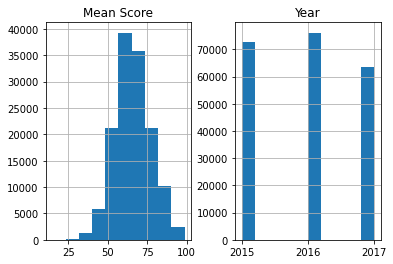

In [9]:
df5.hist()

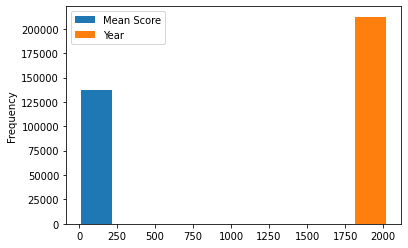

In [10]:
df5.plot(kind="hist")

In [ ]:
df5.groupby('Regents Exam')['Mean Score'].max().sort_values(ascending=False)

NameError: ignored

In [ ]:
df5.groupby('School Name')['Mean Score'].max().sort_values(ascending=False)

School Name
High School of American Studies at Lehman College     98.7
Central Park East High School                         98.3
Townsend Harris High School                           97.6
Bronx High School of Science                          97.6
Stuyvesant High School                                97.4
                                                      ... 
Success Academy Charter School - Harlem 3              NaN
Technology, Arts, and Sciences Studio                  NaN
The 47 American Sign Language & English Lower Scho     NaN
University Neighborhood Middle School                  NaN
Upper School @ P.S. 25                                 NaN
Name: Mean Score, Length: 1012, dtype: float64

In [ ]:
Tips = sns.load_dataset(df)

ValueError: ignored

In [ ]:
df6 = df[(df['School Name'] == 'Abraham Lincoln High School') & (df['Regents Exam'] == 'Geometry')]
df6[df6['Mean Score'] ]

KeyError: ignored

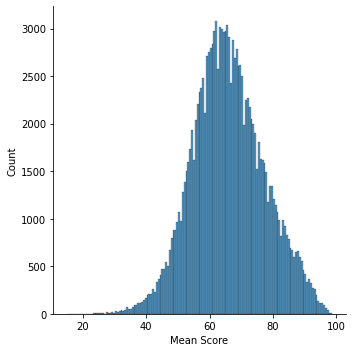

In [11]:
sns.displot(df5['Mean Score'])

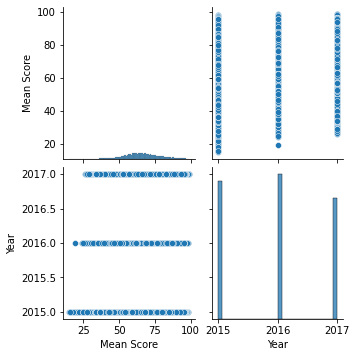

In [12]:
sns.pairplot(df5)

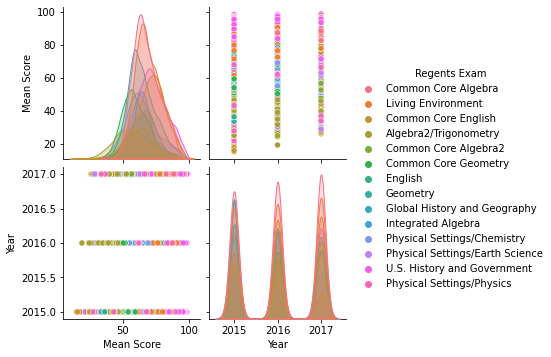

In [13]:
sns.pairplot(df5, hue = 'Regents Exam')